# **Lab 3: Convolutional Neural Network**

The lab report will be due by **March 22nd, 2023**. 

**Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

##**Problem 1**
In this problem, we will focus on an hand-written digit recognition task (i.e. multi-class classification task) for MNIST dataset that was introduced in our class. In this project, you are asked to design a convolutional neural network (CNN) with three convolutional layers and three max-pooling layers. 

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors. 

11490434/11490434 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 50)          22550     
                                                         

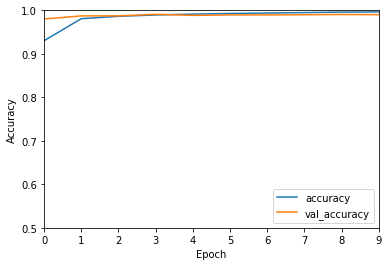

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

# Download MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

# Buidling CNN
model = models.Sequential()
# model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10))
model.summary()

# from_logits = False if you set the activation function as softmax in the last dense layer

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will focus on an image identification task (i.e. multi-class classification task) for Fashion MNIST dataset. In this project, you are asked to design a fully-connected neural network (FCNN) and a CNN, respectively, for this task. You will have the full freedom to design the structures of your FCNN and CNN.

Requirments: 
*   You need to include the following four components in your lab report: (1) the codes for FCNN and CNN, (2) the obtained training errors by using FCNN and CNN, respectively, (3) the obtained testing errors by using FCNN and CNN, and (4) your observation by comparing the performances of FCNN-based and CNN-based solutions. 

In [ ]:
# Hint: Download MNIST fashion dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


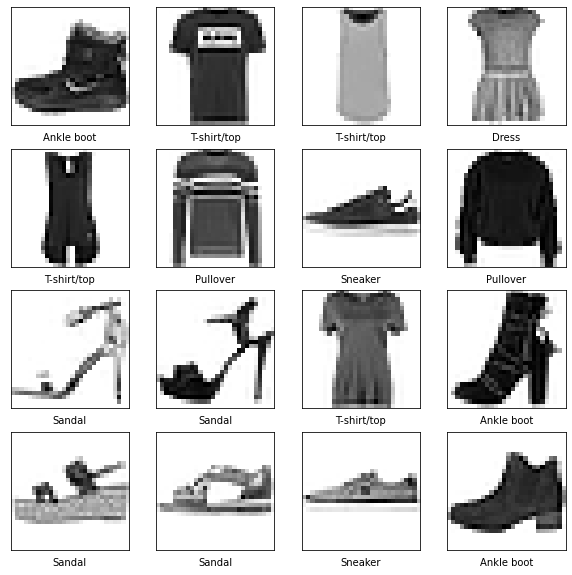

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2522 - accuracy: 0.6261 - val_loss: 0.8139 - val_accuracy: 0.7153
Epoch 2/10
1875/1875 [==================

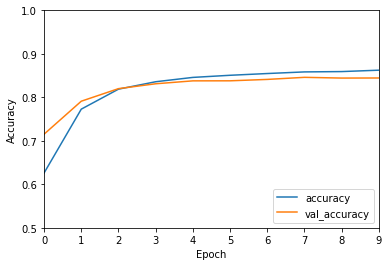

In [2]:
# FCNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST fashion dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Visualize the data samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Preprocessing the data
x_train = x_train.reshape(len(x_train), 28, 28).astype('float32') / 255.0
x_test = x_test.reshape(len(x_test), 28, 28).astype('float32') / 255.0

# Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(20, activation='sigmoid'))
tf.keras.layers.Dropout(0.2)
model.add(layers.Dense(10))
model.summary()

# Compile and training the fully-connected NN model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 25)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 50)        11300     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1800)              0         
                                                                 
 dense_5 (Dense)             (None, 100)              

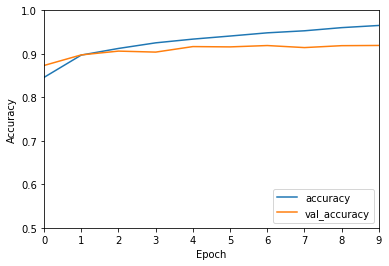

In [3]:
# CNN
# Download MNIST fashion dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Preprocessing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Buidling CNN
model = models.Sequential()
# model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10))
model.summary()

# Compile and training the CNN model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 3**
In this problem, we will explore the application CNN to realize image identification task (i.e. multi-class classification task) for CIFAR-10 dataset. In this lab, you will have the full freedom to design the structure of your CNN.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error. 
(Comment: Since the data is relatively complex, it is fine that you cannot get a high accuracy.)

In [ ]:
# Hint: Download CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


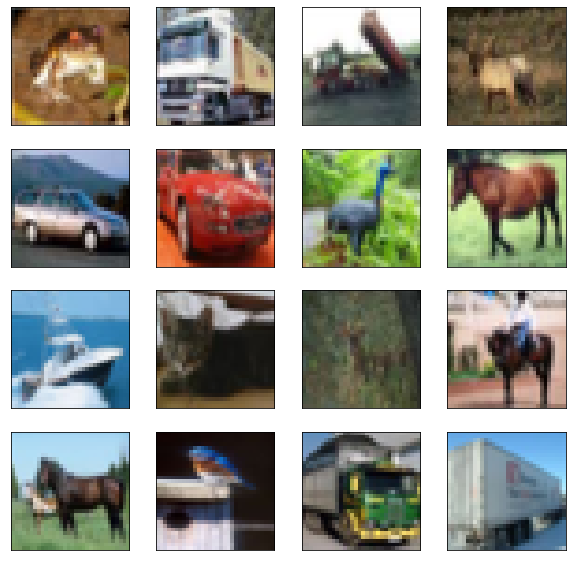

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 64)        

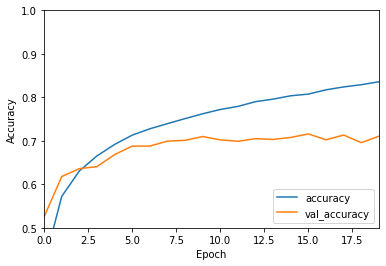

In [4]:
# import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# Download CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Visualize the data samples
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

# Preprocessing the data
x_train = x_train/ 255.0
x_test = x_test/ 255.0

# Buidling CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

# Compile and training the CNN model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test))

# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 19])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)